In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [281]:
#Download the database of fatal US police interventions , and then load it into the DataFrame
df = pd.read_csv(r"c:\Users\litch\HTML\Module15\fatal_police_shootings_data.csv")

In [282]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [283]:
import numpy as np
#Convert the table to show both the number of victims of intervention by race
df.pivot_table(values='name',index='signs_of_mental_illness',columns='race',aggfunc=np.sum)

race,A,B,H,N,O,W
signs_of_mental_illness,,,,,,
False,Hung TrieuCarl LaoLue VangThong Kien MaTon Ngu...,Leslie Sapp IIIRon SneedOmarr Julian Maximilli...,John Paul QuinteroMichael RodriguezKenneth Arn...,Nicolas Leland TewaJustin FowlerJoe Charboneau...,Zaki ShinwaryNadir SoofiBruce ZalonkaFeras Mor...,Lewis Lee LembkeKenneth Joe BrownBrock Nichols...
True,Tim ElliotMatautu NuuJoseph Jeremy WeberThongs...,Hashim Hanif Ibn Abdul-RasheedMario JordanDari...,Jose CejaDavid GarciaAntonio Zambrano-MontesDa...,Daniel CovarrubiasPaul CastawayHerman BeanSher...,Fridoon Zalbeg NehadMohammad Youssef Abdulazee...,Matthew HoffmanTommy SmithRichard McClendonQui...


In [284]:
#df1= df.pivot_table(values='name',index='signs_of_mental_illness',columns='race',aggfunc=np.sum)
#df1
#Use Map, Applymapor , Applyto add to this statement a column indicating what percentage of victims of the intervention showed signs of mental illness for each of the races

victim_dict = dict(zip(df['race'].unique(),['25.8','28.8','17.4','14.2','22.9','21.7','17.9']))

In [285]:
victim_dict

{'A': '25.8',
 'W': '28.8',
 'H': '17.4',
 'B': '14.2',
 'O': '22.9',
 nan: '21.7',
 'N': '17.9'}

In [286]:
df['percentage_of_victims'] = df['race'].map(victim_dict)
df['percentage_of_victims']

0       25.8
1       28.8
2       17.4
3       28.8
4       17.4
        ... 
5411    28.8
5412    21.7
5413    28.8
5414    21.7
5415    21.7
Name: percentage_of_victims, Length: 5416, dtype: object

In [287]:
#Answer which one has the highest percentage of mental illness during an intervention
fin_max = max(victim_dict, key=victim_dict.get)
print("race_with_highest_mental_illness:",fin_max)

race_with_highest_mental_illness: W


In [288]:
#Add a column for the day of the week on which the intervention took place
df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.day_name()

In [289]:
df['day_of_week']

0          Sunday
1          Sunday
2          Sunday
3       Wednesday
4       Wednesday
          ...    
5411     Saturday
5412     Saturday
5413       Monday
5414      Tuesday
5415      Tuesday
Name: day_of_week, Length: 5416, dtype: object

In [290]:
#Count the interventions by the appropriate day of the week
inter_Monday=df[(df['day_of_week'] == 'Tuesday') ].value_counts().sum()

In [291]:
inter_Monday

659

In [292]:
day_of_week = ["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"]
interventions = np.arange(7)

In [293]:
interventions

array([0, 1, 2, 3, 4, 5, 6])

In [294]:
for i in range(7):
    interventions[i]= df[(df['day_of_week'] == day_of_week[i]) ].value_counts().sum()
    print(interventions[i])

617
659
653
655
596
613
606


In [295]:
interventions

array([617, 659, 653, 655, 596, 613, 606])

In [296]:
res = {day_of_week[i]: interventions[i] for i in range(len(day_of_week))}

In [297]:
res

{'Monday': 617,
 'Tuesday': 659,
 'Wednesday': 653,
 'Thursday': 655,
 'Friday': 596,
 'Saturday': 613,
 'Sunday': 606}

In [298]:
fin_max = max(res, key=res.get)
print("Maximum value:",fin_max)

Maximum value: Tuesday


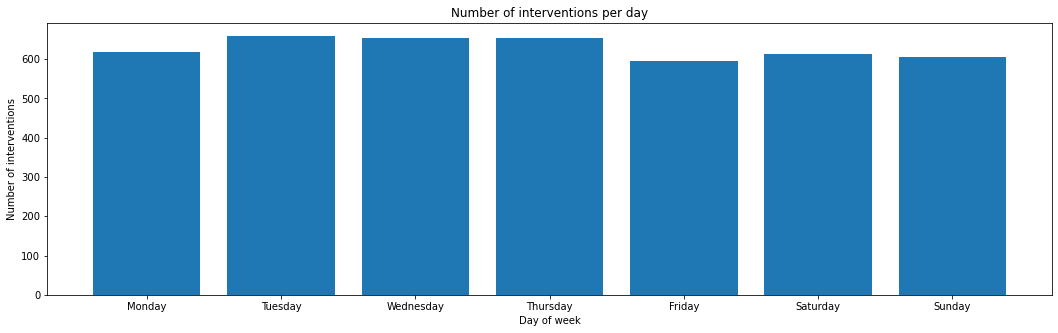

In [299]:
#create a column chart so that the days of the week are lined up Monday through Sunday
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5)) 
plt.bar(range(len(res)), list(res.values()), align='center')
plt.xticks(range(len(res)), list(res.keys()))
plt.title("Number of interventions per day")
plt.xlabel("Day of week")
plt.ylabel("Number of interventions")
plt.show()

In [300]:
#df3 = pd.read_csv(r"c:\Users\litch\HTML\Module15\US_states_code.csv")
df3 = pd.read_csv(r"c:\Users\litch\HTML\Module15\US_states_code.csv")
#df3.head()
#df3
US_State_Code = pd.array(df3['US'])  

In [301]:
#df2 =pd.read_csv(r"c:\Users\litch\HTML\Module15\fatal_police_shootings_data.csv")
##filtered_df2 = df2[(df2['state']=='WA') & (df2['signs_of_mental_illness'])] 
#filtered_df2 = df2[(df2['state']=='WA')].count()
#total_WA=filtered_df2['signs_of_mental_illness']

In [302]:
#filtered_df3 = df2[(df2['state']=='WA') & (df2['signs_of_mental_illness'])].count()
#true_WA = filtered_df3['signs_of_mental_illness']

In [303]:
#number_of_incidents_per_thousand=round((true_WA/total_WA)*1000)

In [304]:
#number_of_incidents_per_thousand

In [305]:
number_of_incidents_per_thousand_per_state = []

In [306]:
#Combine these databases so that you can count the number of incidents in the Lethal Intervention Database per 1,000 inhabitants in each state
def my_function(x=[]): 
    df2 =pd.read_csv(r"c:\Users\litch\HTML\Module15\fatal_police_shootings_data.csv")  
    for i in range(len(x)):
            #print(x[i])
            filtered_df2 = df2[(df2['state']==x[i])].count()
            total_states=filtered_df2['signs_of_mental_illness']
            filtered_df3 = df2[(df2['state']==x[i]) & (df2['signs_of_mental_illness'])].count()
            true_states = filtered_df3['signs_of_mental_illness'] 
            number_of_incidents_per_thousand=round((true_states/total_states)*1000)
            number_of_incidents_per_thousand_per_state.append(number_of_incidents_per_thousand) 

In [307]:
my_function(US_State_Code)

In [308]:
number_of_incidents_per_thousand_per_state

[250,
 154,
 185,
 157,
 228,
 128,
 238,
 308,
 154,
 269,
 209,
 200,
 143,
 173,
 253,
 219,
 240,
 74,
 211,
 91,
 278,
 314,
 321,
 344,
 138,
 149,
 129,
 208,
 281,
 462,
 206,
 179,
 366,
 212,
 182,
 245,
 220,
 307,
 250,
 0,
 193,
 353,
 245,
 185,
 267,
 444,
 274,
 342,
 222,
 264,
 357]

In [309]:
len(US_State_Code)

51

In [310]:
dict_number_of_incidents_per_thousand_per_state = {US_State_Code[i]: number_of_incidents_per_thousand_per_state[i] for i in range(len(US_State_Code))}

In [311]:
dict_number_of_incidents_per_thousand_per_state

{'AL': 250,
 'AK': 154,
 'AZ': 185,
 'AR': 157,
 'CA': 228,
 'CO': 128,
 'CT': 238,
 'DE': 308,
 'DC': 154,
 'FL': 269,
 'GA': 209,
 'HI': 200,
 'ID': 143,
 'IL': 173,
 'IN': 253,
 'IA': 219,
 'KS': 240,
 'KY': 74,
 'LA': 211,
 'ME': 91,
 'MD': 278,
 'MA': 314,
 'MI': 321,
 'MN': 344,
 'MS': 138,
 'MO': 149,
 'MT': 129,
 'NE': 208,
 'NV': 281,
 'NH': 462,
 'NJ': 206,
 'NM': 179,
 'NY': 366,
 'NC': 212,
 'ND': 182,
 'OH': 245,
 'OK': 220,
 'OR': 307,
 'PA': 250,
 'RI': 0,
 'SC': 193,
 'SD': 353,
 'TN': 245,
 'TX': 185,
 'UT': 267,
 'VT': 444,
 'VA': 274,
 'WA': 342,
 'WV': 222,
 'WI': 264,
 'WY': 357}